In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re



In [194]:
df = pd.read_excel('Book1.xlsx',engine='openpyxl')
df.head()



,Unit Link,Pictures,price,rooms,bathrooms,area,Offer,Description,Property Type,Offer Type,Reference Number,Building Status,fretiter,date add,owership,Company,Agent,Compound Name,State,City
0,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14000000 EG,3غرفه,2حمام,154 متر,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,للبيع,بيوت - 6139-bV2TQl,قيد الإنشاء,NaN,5 أكتوبر 2024,أول سكن,Platinum Real Estate,Platinum,جاردن ليكس,6 أكتوبر,الجيزة
1,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,13000000 EG,3غرفه,2حمام,218 متر,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,للبيع,بيوت - farahtajcity,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Lacerta Real Estate,Farah,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,7320000 EG,3غرفه,1حمام,72 متر,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,للبيع,بيوت - HT,قيد الإنشاء,المفروشة,2 أكتوبر 2024,اعادة البيع,اووك ريل استيت,Oak real estate,جاردن ليكس,6 أكتوبر,الجيزة
3,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14632930 EG,3غرفه,5حمام,286 متر,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,للبيع,بيوت - 068,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Royal Hills,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,6800000 EG,3غرفه,1حمام,40 متر,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,للبيع,بيوت - 5000329-CfzrMP,جاهز,غير المفروشة,2 أكتوبر 2024,أول سكن,Modern Cairo,Mohamed Abdallah,ريف دو نيل,المعادي,القاهرة


In [195]:


# Rename columns
column_translation = {
    'نوع العقار': 'Property Type',
    'نوع العرض': 'Offer Type',
    'الرقم المرجعي': 'Reference Number',
    'حالة البناء': 'Building Status',
    'التأثيث': 'Furnishing',
    'تاريخ الإضافة': 'Date Added',
    'الملكية العقارية': 'Ownership',
    'price':'Price',
    'rooms':'Rooms',
    'bathrooms': 'Bathrooms',
    'area':'Area',
    'date add':'Date Added'
}
df.rename(columns=column_translation, inplace=True)

numeric_columns = ['Price', 'Rooms', 'Bathrooms', 'Area']
for col in numeric_columns:
    df[col] = df[col].apply(
        lambda value: int(re.findall(r'\d+', str(value).replace(',', ''))[0]) if pd.notna(value) and re.findall(r'\d+', str(value).replace(',', '')) else None
    )

print(df)


                                               Unit Link  \
0      https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
1      https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
2      https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
3      https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
4      https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
...                                                  ...   
48877  https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
48878  https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
48879  https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
48880  https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   
48881  https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...   

                                                Pictures       Price  Rooms  \
0      ['https://bayut-eg-production.s3.amazonaws.com...  14000000.0    3.0   
1      ['https://bayut-eg-production.s3.amazonaws.com...  13000000.0    3.0   
2      ['https://bayut-eg-production.s3.am

In [196]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit Link         48876 non-null  object 
 1   Pictures          48876 non-null  object 
 2   Price             48876 non-null  float64
 3   Rooms             48876 non-null  float64
 4   Bathrooms         48876 non-null  float64
 5   Area              48876 non-null  float64
 6   Offer             48871 non-null  object 
 7   Description       48876 non-null  object 
 8   Property Type     48876 non-null  object 
 9   Offer Type        48876 non-null  object 
 10  Reference Number  48876 non-null  object 
 11  Building Status   48876 non-null  object 
 12  fretiter          36506 non-null  object 
 13  Date Added        48824 non-null  object 
 14  owership          48876 non-null  object 
 15  Company           48875 non-null  object 
 16  Agent             48875 non-null  object

,Unit Link,Pictures,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Offer Type,Reference Number,Building Status,fretiter,Date Added,owership,Company,Agent,Compound Name,State,City
0,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,للبيع,بيوت - 6139-bV2TQl,قيد الإنشاء,NaN,5 أكتوبر 2024,أول سكن,Platinum Real Estate,Platinum,جاردن ليكس,6 أكتوبر,الجيزة
1,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,للبيع,بيوت - farahtajcity,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Lacerta Real Estate,Farah,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,للبيع,بيوت - HT,قيد الإنشاء,المفروشة,2 أكتوبر 2024,اعادة البيع,اووك ريل استيت,Oak real estate,جاردن ليكس,6 أكتوبر,الجيزة
3,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,للبيع,بيوت - 068,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,أول سكن,Royal Hills,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,للبيع,بيوت - 5000329-CfzrMP,جاهز,غير المفروشة,2 أكتوبر 2024,أول سكن,Modern Cairo,Mohamed Abdallah,ريف دو نيل,المعادي,القاهرة


In [197]:
df.rename(columns={'owership': 'Ownership'}, inplace=True)


In [198]:
df['Property Type'].unique()

array(['شقة', 'توين هاوس', 'شاليه', 'فيلا', 'تاون هاوس', 'بنتهاوس',
       'دوبلكس', 'شقة فندقية', 'غرفة', 'اي فيلا', 'عقارات سكنية اخرى',
       'كبينة', nan, 'أرض سكنية'], dtype=object)

In [199]:
df['Ownership'].unique()

array(['أول سكن', 'اعادة البيع', '1 أكتوبر 2024', 0, '2 أكتوبر 2024', nan],
      dtype=object)

In [200]:
translation_map = {
    'أول سكن': 'First Residence',
    'اعادة البيع': 'Resale'
}
df['Ownership'] = df['Ownership'].replace(translation_map)
df.head()

,Unit Link,Pictures,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Offer Type,Reference Number,Building Status,fretiter,Date Added,Ownership,Company,Agent,Compound Name,State,City
0,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,للبيع,بيوت - 6139-bV2TQl,قيد الإنشاء,NaN,5 أكتوبر 2024,First Residence,Platinum Real Estate,Platinum,جاردن ليكس,6 أكتوبر,الجيزة
1,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,للبيع,بيوت - farahtajcity,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,First Residence,Lacerta Real Estate,Farah,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,للبيع,بيوت - HT,قيد الإنشاء,المفروشة,2 أكتوبر 2024,Resale,اووك ريل استيت,Oak real estate,جاردن ليكس,6 أكتوبر,الجيزة
3,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,للبيع,بيوت - 068,قيد الإنشاء,غير المفروشة,2 أكتوبر 2024,First Residence,Royal Hills,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,للبيع,بيوت - 5000329-CfzrMP,جاهز,غير المفروشة,2 أكتوبر 2024,First Residence,Modern Cairo,Mohamed Abdallah,ريف دو نيل,المعادي,القاهرة


In [201]:
df['Offer Type'].fillna('for sale' , inplace= True)

<ipython-input-201-a11fb1e7a24d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Offer Type'].fillna('for sale' , inplace= True)


In [202]:
translation_map = {
    'للبيع': 'for sale'
}
df['Offer Type'].replace(translation_map , inplace=True)

In [203]:
translation_map = {
    'جاهز': 'ready'
    ,
    'قيد الإنشاء' : 'under construction'
}
df['Building Status'].replace(translation_map , inplace=True)

<ipython-input-203-6b9de7356929>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Building Status'].replace(translation_map , inplace=True)


In [204]:
df.head()

,Unit Link,Pictures,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Offer Type,Reference Number,Building Status,fretiter,Date Added,Ownership,Company,Agent,Compound Name,State,City
0,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,for sale,بيوت - 6139-bV2TQl,under construction,NaN,5 أكتوبر 2024,First Residence,Platinum Real Estate,Platinum,جاردن ليكس,6 أكتوبر,الجيزة
1,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,for sale,بيوت - farahtajcity,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Lacerta Real Estate,Farah,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,for sale,بيوت - HT,under construction,المفروشة,2 أكتوبر 2024,Resale,اووك ريل استيت,Oak real estate,جاردن ليكس,6 أكتوبر,الجيزة
3,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,for sale,بيوت - 068,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Royal Hills,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,https://www.bayut.eg/%D8%AA%D9%81%D8%A7%D8%B5%...,['https://bayut-eg-production.s3.amazonaws.com...,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,for sale,بيوت - 5000329-CfzrMP,ready,غير المفروشة,2 أكتوبر 2024,First Residence,Modern Cairo,Mohamed Abdallah,ريف دو نيل,المعادي,القاهرة


In [205]:
df = df.drop(['Unit Link', 'Pictures', 'Reference Number', 'Agent'], axis=1)
df.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Offer Type,Building Status,fretiter,Date Added,Ownership,Company,Compound Name,State,City
0,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,شقة,for sale,under construction,NaN,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,الجيزة
1,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,شقة,for sale,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,شقة,for sale,under construction,المفروشة,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,الجيزة
3,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,توين هاوس,for sale,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,شقة,for sale,ready,غير المفروشة,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,القاهرة


In [206]:
property_type_mapping = {
    'شقة': 'Apartment',
    'توين هاوس': 'Twin House',
    'شاليه': 'Chalet',
    'فیلا': 'Villa',
    'تاون هاوس': 'Townhouse',
    'بنتهاوس': 'Penthouse',
    'دوبلكس': 'Duplex',
    'شقة فندقية': 'Hotel Apartment',
    'غرفة': 'Room',
    'اي فيلا': 'E-Villa',
    'عقارات سكنية اخرى': 'Other Residential',
    'كبينة': 'Cabin',
    'أرض سكنية': 'Residential Land',
}

df['Property Type'] = df['Property Type'].map(property_type_mapping)

df['Property Type'] = df['Property Type'].fillna(df['Property Type'].mode()[0])

print(df['Property Type'].unique())


['Apartment' 'Twin House' 'Chalet' 'Townhouse' 'Penthouse' 'Duplex'
 'Hotel Apartment' 'Room' 'E-Villa' 'Other Residential' 'Cabin'
 'Residential Land']


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            48876 non-null  float64
 1   Rooms            48876 non-null  float64
 2   Bathrooms        48876 non-null  float64
 3   Area             48876 non-null  float64
 4   Offer            48871 non-null  object 
 5   Description      48876 non-null  object 
 6   Property Type    48882 non-null  object 
 7   Offer Type       48882 non-null  object 
 8   Building Status  48876 non-null  object 
 9   fretiter         36506 non-null  object 
 10  Date Added       48824 non-null  object 
 11  Ownership        48876 non-null  object 
 12  Company          48875 non-null  object 
 13  Compound Name    48876 non-null  object 
 14  State            41780 non-null  object 
 15  City             48875 non-null  object 
dtypes: float64(4), object(12)
memory usage: 6.0+ MB


In [208]:
df.drop(columns=['Offer Type'] , axis = 1 , inplace= True)

In [209]:
df.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,fretiter,Date Added,Ownership,Company,Compound Name,State,City
0,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,NaN,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,الجيزة
1,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,Apartment,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,القاهرة
2,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,Apartment,under construction,المفروشة,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,الجيزة
3,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,Twin House,under construction,غير المفروشة,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,الجيزة
4,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,Apartment,ready,غير المفروشة,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,القاهرة


In [210]:
df.rename(columns={'fretiter': 'Furnishing'}, inplace=True)


In [211]:
df['Furnishing'] = df['Furnishing'].apply(lambda x: 'مفروشة' if x != 'غير المفروشة' else 'غير المفروشة')

furnishing_mapping = {
    'مفروشة': 'Furnished',
    'غير المفروشة': 'Unfurnished'
}

df['Furnishing'] = df['Furnishing'].map(furnishing_mapping)

print(df['Furnishing'].unique())


['Furnished' 'Unfurnished']


In [212]:
df['Ownership'].fillna(df['Ownership'].mode() , inplace= True)



<ipython-input-212-04e44656757e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ownership'].fillna(df['Ownership'].mode() , inplace= True)


In [213]:
import pandas as pd

# Rename the city values
city_mapping = {
    'الجيزة': 'Giza',
    'القاهرة': 'Cairo',
    'مطروح': 'Matrouh',
    'البحر الأحمر': 'Red Sea',
    'السويس': 'Suez',
    'الإسكندرية': 'Alexandria',
    'الدقهلية': 'Dakahlia',
    'جنوب سيناء': 'South Sinai',
    'كفر الشيخ': 'Kafr El Sheikh',
    'دمياط': 'Damietta',
    'أسيوط': 'Assiut',
    'سوهاج': 'Sohag',
    'الشرقية': 'Sharqia',
    'الإسماعيلية': 'Ismailia'
}

# Apply the renaming to the 'City' column
df['City'] = df['City'].map(city_mapping)




In [214]:
df.head()

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City
0,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,Furnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza
1,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,Cairo
2,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,Apartment,under construction,Furnished,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,Giza
3,14632930.0,3.0,5.0,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,Twin House,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,Giza
4,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,Apartment,ready,Unfurnished,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,Cairo


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            48876 non-null  float64
 1   Rooms            48876 non-null  float64
 2   Bathrooms        48876 non-null  float64
 3   Area             48876 non-null  float64
 4   Offer            48871 non-null  object 
 5   Description      48876 non-null  object 
 6   Property Type    48882 non-null  object 
 7   Building Status  48876 non-null  object 
 8   Furnishing       48882 non-null  object 
 9   Date Added       48824 non-null  object 
 10  Ownership        48876 non-null  object 
 11  Company          48875 non-null  object 
 12  Compound Name    48876 non-null  object 
 13  State            41780 non-null  object 
 14  City             48875 non-null  object 
dtypes: float64(4), object(11)
memory usage: 5.6+ MB


In [216]:
df = df.drop_duplicates()

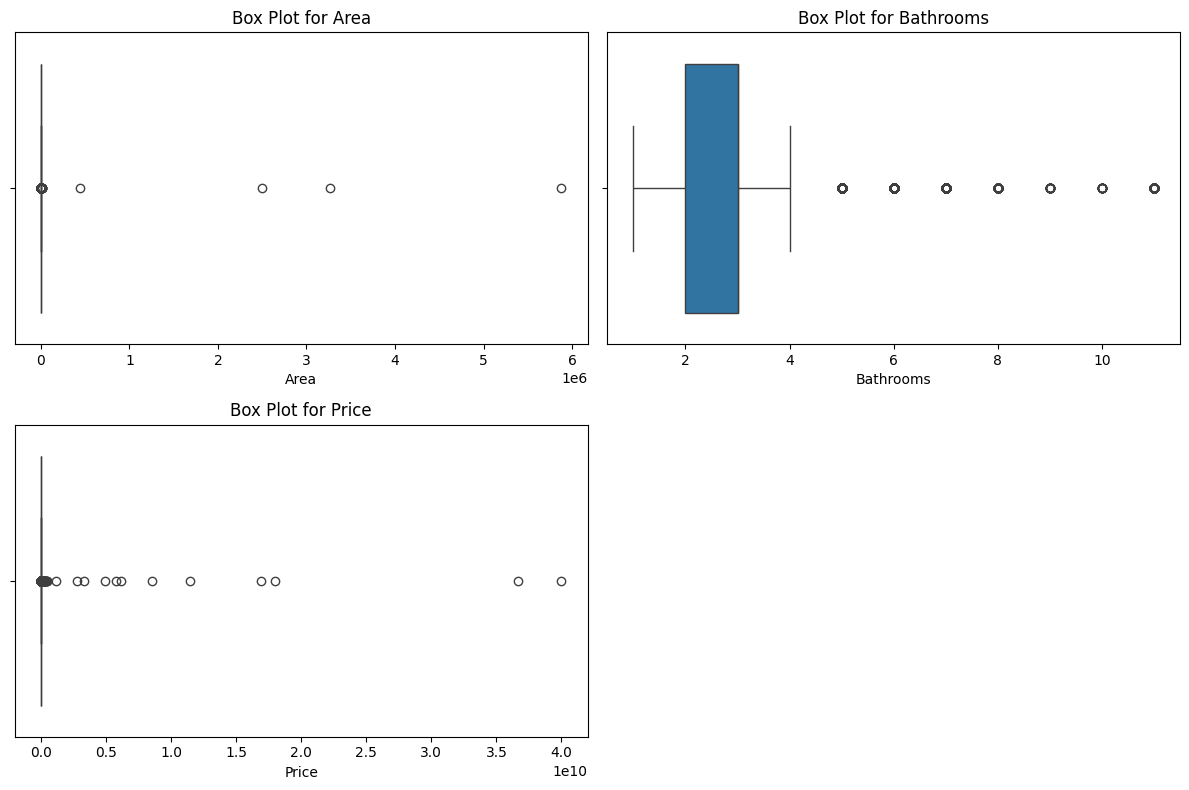

In [217]:
columns_to_plot = ['Area', 'Bathrooms', 'Price']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


In [218]:
import pandas as pd

def replace_outliers_with_fence(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_fence if x < lower_fence else x)
    df[column] = df[column].apply(lambda x: upper_fence if x > upper_fence else x)
    return df

columns_to_check = ['Area', 'Bathrooms', 'Price']
df[columns_to_check] = df[columns_to_check].apply(lambda col: col.fillna(col.median()))


for col in columns_to_check:
    df = replace_outliers_with_fence(df, col)


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47849 entries, 0 to 48881
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            47849 non-null  float64
 1   Rooms            47848 non-null  float64
 2   Bathrooms        47849 non-null  float64
 3   Area             47849 non-null  float64
 4   Offer            47843 non-null  object 
 5   Description      47848 non-null  object 
 6   Property Type    47849 non-null  object 
 7   Building Status  47848 non-null  object 
 8   Furnishing       47849 non-null  object 
 9   Date Added       47796 non-null  object 
 10  Ownership        47848 non-null  object 
 11  Company          47847 non-null  object 
 12  Compound Name    47848 non-null  object 
 13  State            40848 non-null  object 
 14  City             47847 non-null  object 
dtypes: float64(4), object(11)
memory usage: 5.8+ MB


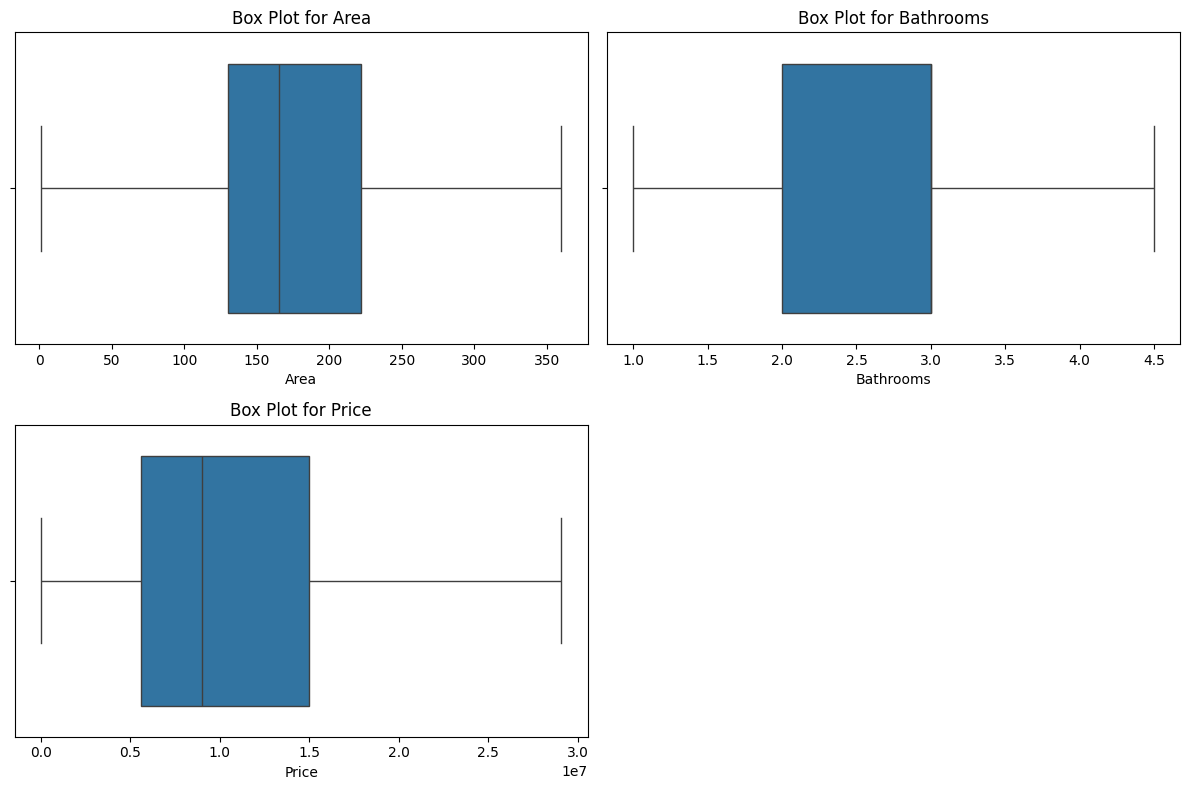

In [220]:
columns_to_plot = ['Area', 'Bathrooms','Price']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


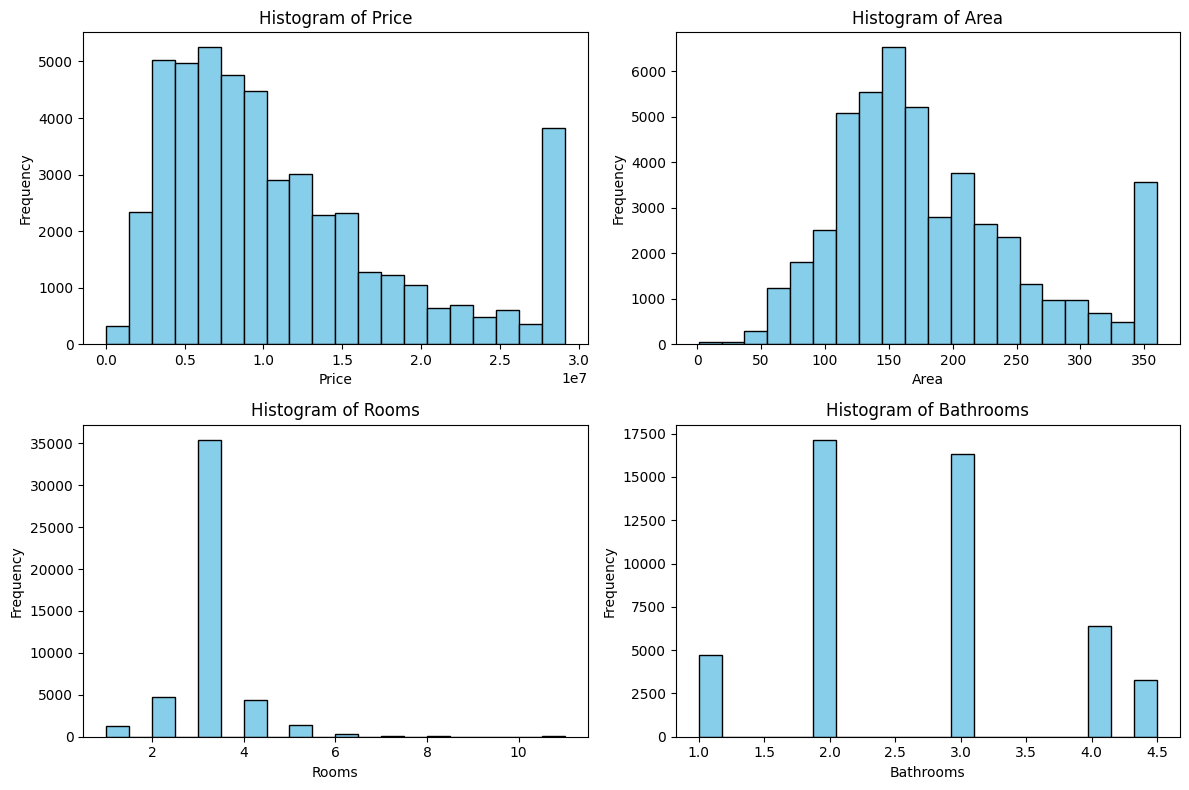

In [221]:
import matplotlib.pyplot as plt

columns_to_plot = ['Price', 'Area', 'Rooms', 'Bathrooms']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid and select the i-th subplot
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


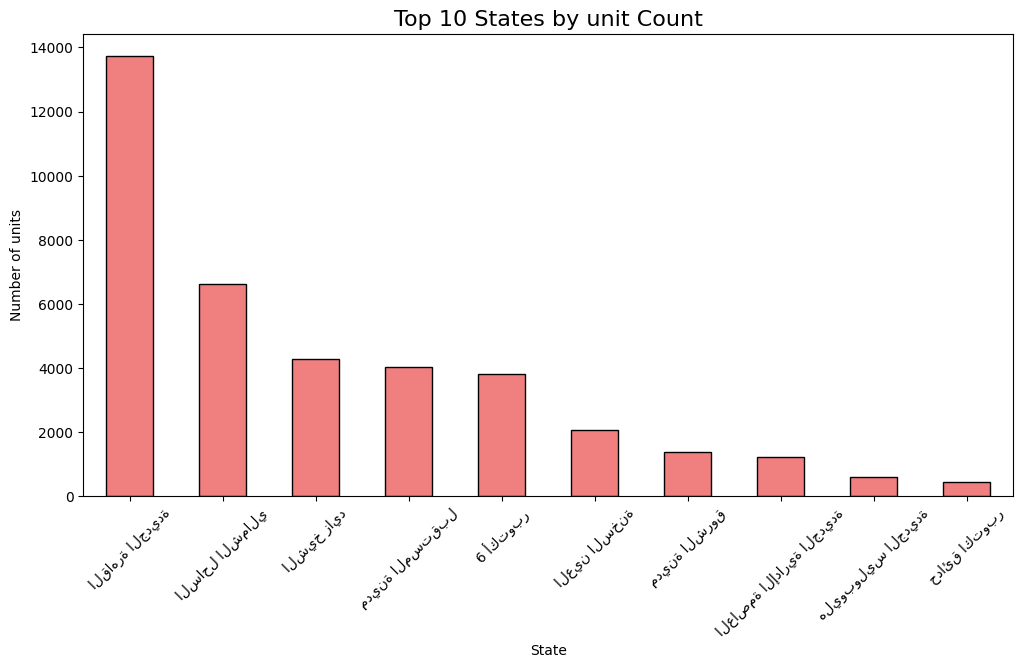

In [222]:


state_counts = df['State'].value_counts().head(10)
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 States by unit Count', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of units')
plt.xticks(rotation=45)
plt.show()


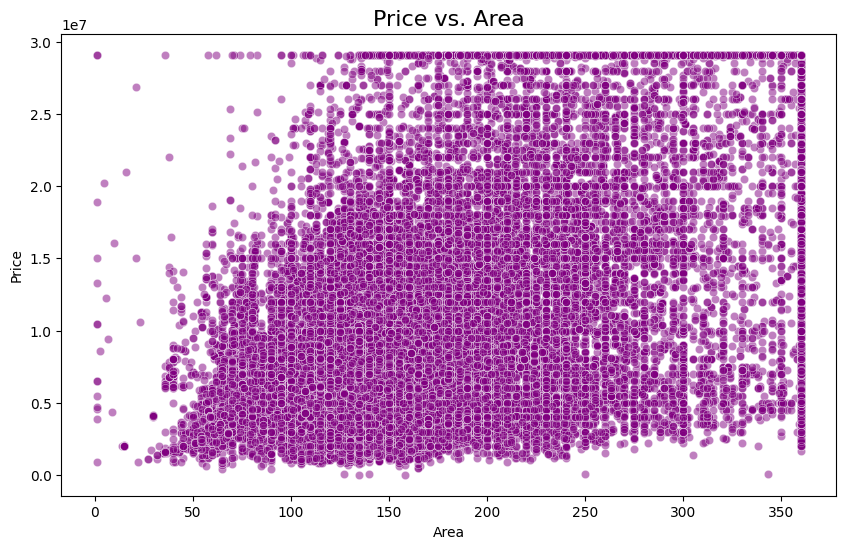

In [223]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.5, color='purple')
plt.title('Price vs. Area', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


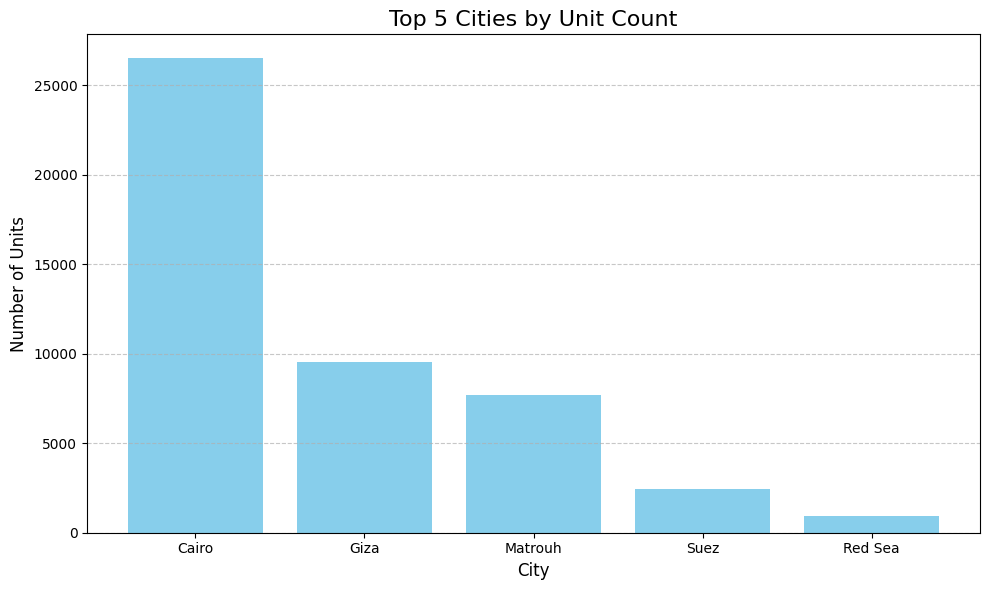

In [224]:

# Aggregate data: Count of units (number of rows) per city
city_counts = df.groupby('City').size().reset_index(name='Units')

# Sort by Units in descending order and select the top 5 cities
top_cities = city_counts.sort_values(by='Units', ascending=False).head(5)

# Plotting a bar chart for the top 5 cities
plt.figure(figsize=(10, 6))

# Bar plot for unit counts
plt.bar(top_cities['City'], top_cities['Units'], color='skyblue')

# Adding labels and title
plt.title('Top 5 Cities by Unit Count', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Units', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-225-b8600ae6ba6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rooms', y='Price', data=df, palette='coolwarm')


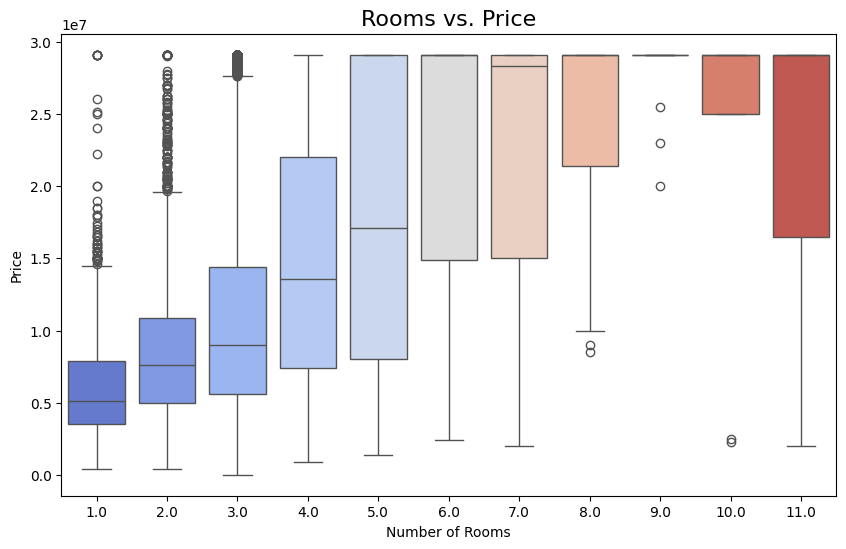

In [225]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=df, palette='coolwarm')
plt.title('Rooms vs. Price', fontsize=16)
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

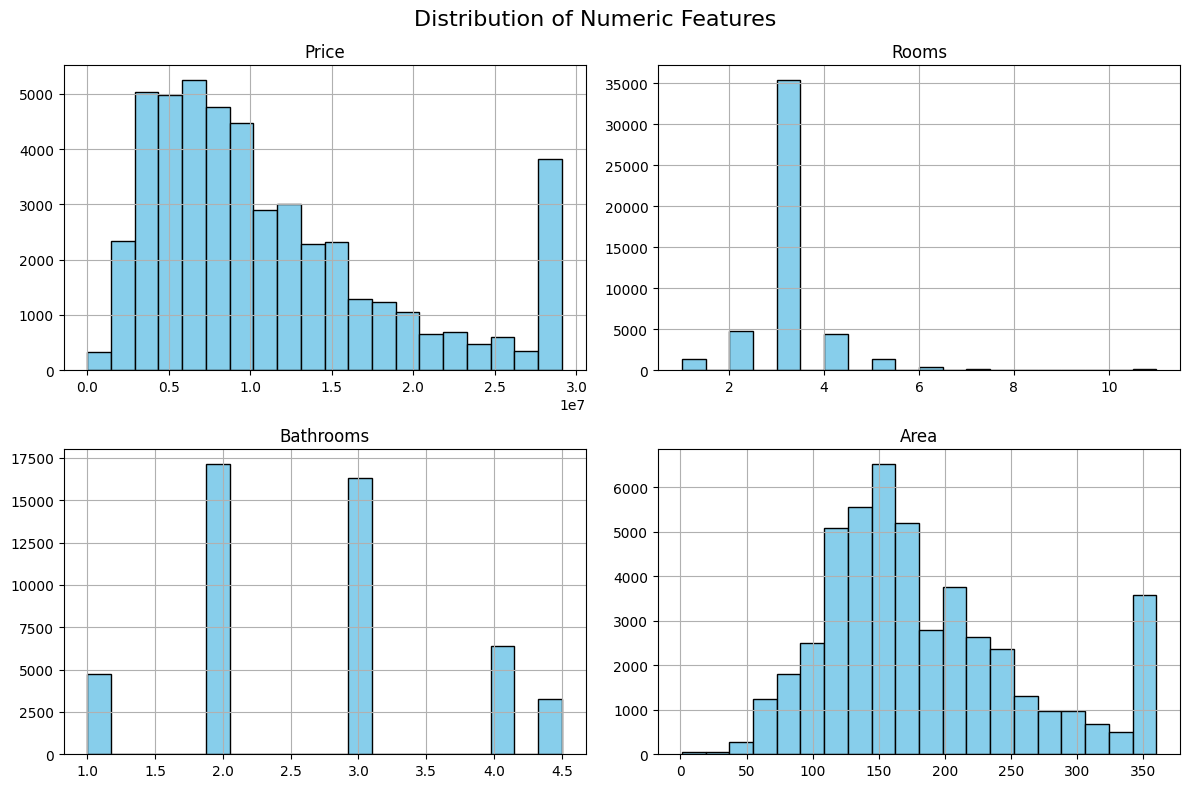

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df.head()

numeric_features = ['Price', 'Rooms', 'Bathrooms', 'Area']
df[numeric_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

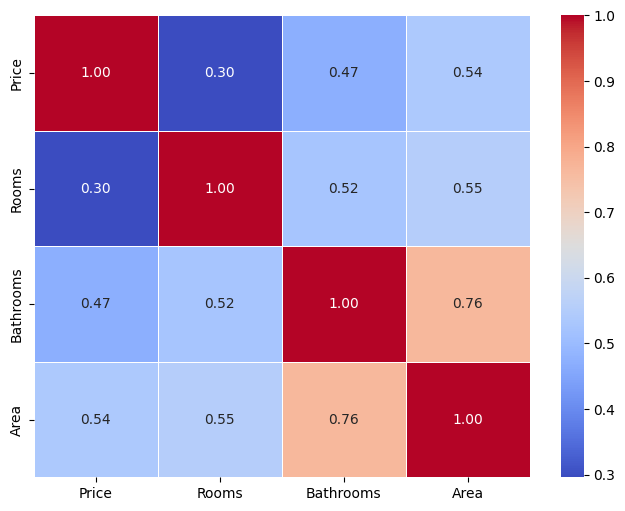

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first 4 columns and the 'Price' column
selected_columns = df[[ df.columns[0], df.columns[1], df.columns[2], df.columns[3]]]

# Calculate the correlation matrix for the selected columns
corr = selected_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


#Regex




In [228]:


pattern = r"(?<=\bمميزات\s)(.*)"

df_with_features = df[df["Description"].str.contains(r"\bمميزات\b", flags=re.IGNORECASE, na=False)]

df_with_features["features_extracted"] = df_with_features["Description"].apply(
    lambda x: re.search(pattern, x).group(1).strip() if re.search(pattern, x) else ""
)



<ipython-input-228-bef6e4c88bf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_features["features_extracted"] = df_with_features["Description"].apply(


In [229]:
df_with_features.head(5000)

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,features_extracted
20,5250000.0,3.0,3.0,230.0,امتلك شقة 230م باقل سعر وتسهيلات في اللوتس الج...,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...
23,6612000.0,3.0,3.0,229.0,شقة مميزة للبيع في بيت الوطن التجمع الخامس,شقة مميزة للبيع في بيت الوطن التجمع الخامس علي...,Apartment,ready,Unfurnished,3 أكتوبر 2024,Resale,Capital Lords,بيت الوطن,القاهرة الجديدة,Cairo,بيت الوطن التجمع الخامسأفضل أنظمة سداد بالتجمع...
27,4950000.0,3.0,3.0,228.0,امتلك شقة 230 متر في الدور الثالث باللوتس الجديدة,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...
30,3221500.0,3.0,3.0,170.0,استلم شقتك دلوقتي في اميز مناطق العاصمه الادار...,استلم شقتك دلوقتي في اميز مناطق العاصمه الادار...,Apartment,ready,Furnished,3 أكتوبر 2024,First Residence,deal,ميدتاون كوندو,العاصمة الإدارية الجديدة,Cairo,المشروع:**- أول كومبوند وأول مول سيتم تسليمه و...
32,5150000.0,3.0,3.0,220.0,امتلك شقة 220 متر بحديقة 160 متر باللوتس الجديدة,شقة للبيع في زهرة اللوتس الجديدةوبتسهيلات فى ا...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Golden Point,اللوتس,القاهرة الجديدة,Cairo,الموقع ?* اكثر مواقع اللوتس تميزا وتطل على فيو...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48569,2400000.0,5.0,4.5,360.0,فيلا توين هاوس للبيع في ديونز الشيخ زايد امام ...,توين هاوس في كمبوند ليفلز Levels الشيخ زايد ام...,Twin House,under construction,Furnished,13 يوليو 2024,First Residence,Property Hills Plus,كومباوند زايد ديونز,الشيخ زايد,Giza,الكمبوندكمبوند ليفلز على مساحة 80 فدان ( نسبة ...
48574,6206000.0,2.0,2.0,117.0,شقه للبيع استلام فورى بمقدم 10%فقط في كمبوند ص...,شقه للبيع استلام فورى بمقدم 10%فقط في كمبوند ص...,Apartment,ready,Unfurnished,17 ديسمبر 2023,First Residence,AL Hayah Investment,صن كابيتال,حدائق اكتوبر,Giza,الكمبوند انه على شكل حرف U و ده بيحقق احسن رؤي...
48857,15000000.0,5.0,4.5,340.0,توين هاوس للبيع في قريه لافيستا 3 البعين السخن...,توين هاوس للبيع في قريه لافيستا 3 البعين السخن...,Twin House,ready,Furnished,2 أكتوبر 2024,Resale,Capital Lords,العين السخنة,NaN,Suez,قرية لافيستا 3:تعد قرية لافيستا العين السخنة 3...
48859,6000000.0,4.0,4.0,165.0,شاليه بالروف للبيع بلافيستا3 العين السخنه بسعر...,شالية للبيع بقرية لافيستا ?165 متر? نوم?حمامدب...,Chalet,ready,Furnished,2 أكتوبر 2024,Resale,Capital Lords,العين السخنة,NaN,Suez,موقع قرية لافيستا 3 العين السخنة:قرية لافيستا ...


In [230]:

pattern = r"\b(?:قسط|تقسيط)\b\s*(.*)"

df_with_payment_terms = df[df["Offer"].str.contains(r"\b(?:قسط|تقسيط)\b", flags=re.IGNORECASE, na=False)]

df_with_payment_terms["payment_terms_extracted"] = df_with_payment_terms["Offer"].apply(
    lambda x: re.search(pattern, x, flags=re.IGNORECASE).group(1).strip() if re.search(pattern, x, flags=re.IGNORECASE) else ""
)



<ipython-input-230-a5e12e42f94b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_payment_terms["payment_terms_extracted"] = df_with_payment_terms["Offer"].apply(


In [231]:
df_with_payment_terms.head(10)

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,payment_terms_extracted
15,15000000.0,3.0,3.0,212.0,بالقرب من مدينتي فيلا بيع 3 غرف قسط 8 سنين,طرح مرحله جديدهأس فيلا للبيع في كمبوند BUTTER...,Apartment,ready,Furnished,3 أكتوبر 2024,First Residence,Persona,مدينتي,NaN,Cairo,8 سنين
48,12215527.0,3.0,3.0,149.0,شقة استلام فوري 149م متشطبة زايد اكتوبر مقدم 2...,شقة استلام فوري 149م متشطبة زايد اكتوبر مقدم 2...,Apartment,ready,Furnished,3 أكتوبر 2024,First Residence,iL D'ORO Real Estate,الشيخ زايد,NaN,Giza,4 سنوات
75,3620000.0,3.0,2.0,80.0,شاليه للبيع 2نوم متشطب بالفرش لقطه+تقسيط 7 سنين,شاليه للبيع 2نوم متشطب بالفرش لقطه+تقسيط 7 سني...,Chalet,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Home Locator,بيلا رومانس,العين السخنة,Suez,7 سنين
109,29100000.0,3.0,4.5,300.0,توين هاوس استلام فوري يطل علي الاهرامات - قسط ...,توين هاوس في كومبوند صن كابيتالتقسيط علي 6 سنو...,Apartment,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Egypt Hills,صن كابيتال,حدائق اكتوبر,Giza,6 سنوات
118,6006550.0,3.0,2.0,116.0,شقة متشطبة بالتكيفات - لاند اسكيب فيو - قسط يص...,شقة متشطبة بالتكيفات للبيع في أو ويست 6 أكتوبر...,Apartment,under construction,Unfurnished,4 أكتوبر 2024,First Residence,Egypt Hills,كومباوند او ويست,6 أكتوبر,Giza,يصل الي ? سنوات
120,3150000.0,3.0,2.0,143.0,شقه ارضى للبيع 3 غرف مقدم 35 % و قسط على 48 شه...,شقه ارضى للبيع 3 غرف مقدم 35 % و قسط على 48 شه...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Al Arabia Egypt,بيت الوطن,القاهرة الجديدة,Cairo,على 48 شهر شمال بيت الوطن التجمع الخامس القاهر...
156,8624000.0,3.0,2.0,120.0,شاليه استلام فوري 120 م متشطب العين السخنة مقد...,استلام فوري العين السخنهشالية 120 متردور تاني ...,Chalet,ready,Furnished,3 أكتوبر 2024,First Residence,iL D'ORO Real Estate,بلو بلو,العين السخنة,Suez,4 سنوات
213,10756400.0,3.0,1.0,54.0,شقة فندقية متشطبة بالتكييفات والفرش موفنبيك 54...,شقة فندقية متشطبة بالتكييفات والفرش موفنبيك 54...,Hotel Apartment,under construction,Furnished,3 أكتوبر 2024,First Residence,iL D'ORO Real Estate,العاصمة الإدارية الجديدة,NaN,Cairo,4 سنوات
221,3300000.0,3.0,2.0,150.0,ادفع و استثمر فى النورث هاوس شقة 150 متر مقدم ...,ادفع و استثمر فى النورث هاوس شقه 150 متر مقدم ...,Apartment,under construction,Unfurnished,3 أكتوبر 2024,First Residence,Al Arabia Egypt,بيت الوطن,القاهرة الجديدة,Cairo,على 60 شهر شمال الحى الاول بيت الوطن التجمع ال...
247,17000000.0,3.0,2.0,133.0,شقتك متشطبه بالتسعين الشمالي بالقرب من الجامعه...,"شقه للبيع في مون ريزيدنس, فيفث سكويرشقة فى كمب...",Apartment,ready,Unfurnished,3 أكتوبر 2024,First Residence,Impact Investment,كومباوند فيفث سكوير,القاهرة الجديدة,Cairo,علي 8سنين


In [232]:

df_with_payment_terms = df.copy()

df_with_payment_terms["immediate_delivery"] = df_with_payment_terms["Offer"].str.contains(
    r"\bاستلام فوري\b", flags=re.IGNORECASE, na=False
)


In [233]:
df_with_payment_terms.head(10)

,Price,Rooms,Bathrooms,Area,Offer,Description,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City,immediate_delivery
0,14000000.0,3.0,2.0,154.0,شقة للبيع 154م في كمبوند جاردن ليكس Garden lak...,Garden Lakes - Hydeparkشقة مميزة للبيع في كمبو...,Apartment,under construction,Furnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza,False
1,13000000.0,3.0,2.0,218.0,شقة بالروف للبيع بموقع متميز بكومباوند تاج سيت...,التفاصيلشقة بالروف للبيع بموقع متميز بكومباوند...,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,Cairo,False
2,7320000.0,3.0,1.0,72.0,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,استوديو للبيع بكمبوند جاردن ليكس فيو مميز باقل...,Apartment,under construction,Furnished,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,Giza,False
3,14632930.0,3.0,4.5,286.0,توين هاوس للبيع في كمبوند زايد الجديده,للبيع في V. Levels، الشيخ زايد الجديدةتفاصيل ا...,Twin House,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,Giza,False
4,6800000.0,3.0,1.0,40.0,استلام فوري علي النيل مباشره بارده فندق عالمي ...,للتواصل مع المبيعات :عرض معلومات الاتصالwhatsa...,Apartment,ready,Unfurnished,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,Cairo,True
5,12000000.0,3.0,3.0,150.0,شاليه على البحر للبيع بسعر مميز-لافيستا راس ال...,شاليه على البحر للبيع بسعر مميز -لافيستا راس ا...,Chalet,ready,Unfurnished,2 أكتوبر 2024,Resale,يو ار اي,لافيستا رأس الحكمة,الساحل الشمالي,Matrouh,False
6,28000000.0,3.0,4.5,355.0,للبيع توين هاوس داخل كمبوند ازار 1 التجمع الخا...,توين هاوس للبيع داخل كمبوند أزار 1 في التجمع ا...,Twin House,ready,Unfurnished,2 أكتوبر 2024,Resale,Abrag Two,كومباوند ازار,القاهرة الجديدة,Cairo,False
7,3000000.0,3.0,4.0,238.0,فيلا لقطة للبيع بالسعر القديم في ارقي كمبوندات...,امتلك فيلا للبيع بكمبوند ( تاج سيتى Taj City )...,Apartment,ready,Furnished,2 أكتوبر 2024,First Residence,SFR,تاج سلطان,مدينة نصر,Cairo,False
8,7000000.0,3.0,3.0,200.0,شقه متشطبه بجاردن استلام فوري في الجريا بيفرلي...,شقه متشطبه بجاردن استلام فوري في الجريا بيفرلي...,Apartment,ready,Furnished,2 أكتوبر 2024,First Residence,Property Hills Plus,كومباوند بيفرلى هيلز,الشيخ زايد,Giza,True
9,3005255.0,3.0,3.0,204.0,شقة من حسن علام بلوكيشن مميز امام بالم هيلز ود...,شقة من حسن علام بلوكيشن مميز امام بالم هيلز ود...,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Property hills star,سوان ليك ويست,الشيخ زايد,Giza,False


In [234]:
df = df.drop(['Offer'	,'Description'], axis=1)


In [235]:
df.head(10)

,Price,Rooms,Bathrooms,Area,Property Type,Building Status,Furnishing,Date Added,Ownership,Company,Compound Name,State,City
0,14000000.0,3.0,2.0,154.0,Apartment,under construction,Furnished,5 أكتوبر 2024,First Residence,Platinum Real Estate,جاردن ليكس,6 أكتوبر,Giza
1,13000000.0,3.0,2.0,218.0,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Lacerta Real Estate,كومباوند تاج سيتي,القاهرة الجديدة,Cairo
2,7320000.0,3.0,1.0,72.0,Apartment,under construction,Furnished,2 أكتوبر 2024,Resale,اووك ريل استيت,جاردن ليكس,6 أكتوبر,Giza
3,14632930.0,3.0,4.5,286.0,Twin House,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Royal Hills,كومباوند زايد الجديدة,الشيخ زايد,Giza
4,6800000.0,3.0,1.0,40.0,Apartment,ready,Unfurnished,2 أكتوبر 2024,First Residence,Modern Cairo,ريف دو نيل,المعادي,Cairo
5,12000000.0,3.0,3.0,150.0,Chalet,ready,Unfurnished,2 أكتوبر 2024,Resale,يو ار اي,لافيستا رأس الحكمة,الساحل الشمالي,Matrouh
6,28000000.0,3.0,4.5,355.0,Twin House,ready,Unfurnished,2 أكتوبر 2024,Resale,Abrag Two,كومباوند ازار,القاهرة الجديدة,Cairo
7,3000000.0,3.0,4.0,238.0,Apartment,ready,Furnished,2 أكتوبر 2024,First Residence,SFR,تاج سلطان,مدينة نصر,Cairo
8,7000000.0,3.0,3.0,200.0,Apartment,ready,Furnished,2 أكتوبر 2024,First Residence,Property Hills Plus,كومباوند بيفرلى هيلز,الشيخ زايد,Giza
9,3005255.0,3.0,3.0,204.0,Apartment,under construction,Unfurnished,2 أكتوبر 2024,First Residence,Property hills star,سوان ليك ويست,الشيخ زايد,Giza
